<a href="https://colab.research.google.com/github/GeonwooKim200797/Basketball-Data-Analysis/blob/main/Basketball_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Objectives**
## 1. Season 별로 농구...플레이에 있어서 변화가 있었는지? 있었다면 어떻게 변했는지... 농구의 트렌드...
## 2. 어떤 선수들을 뽑는지...뽑는 기준 
## 3. 선수들의 포지션 예측 및 포지션 트렌드 분석 
## 4. Best, Worst Player? 다재다능--> overall stats 이 다 높은 선수
##     먼저 스펙별로 잘하는 선수들을 뽑고... 그 안에서 "어떤 기준"을 통해서 베스트를 뽑는다... 
##     센터: 블록수, shoot 성공률
##     포워드: 스틸, 2점슛? 등등.... 포지션 별 기준을 나눠서 best/worst players를 뽑기.

In [ ]:
import pandas as pd   # <<< 테이블형식의 데이터를 보여주고 싶어서 패키지를 불러왔음
from google.colab import drive # 구글 드라이브와, 지금 이 환경(구글 코랩)을 연겨해서 데이터를 불러오기 위해 google.colab이라는 패키지를 불러왔음
import sklearn  # 수학적인 공식들을 사용하기 위해 이 패키지를 불러올꺼임

# import # <----- 파이썬에 기본적으로 장착되어진 기능들이 아닌, 외부에서 어떤 특정 목적을 위해 만들어진 기능들을 불러오기 위한 명령어임

drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Analysis

# 나누는거(filtering)...
# best, worst players
# 선수들의 부족한 부분 발견
# pattern detection
# prediction
# 




In [ ]:
mydata = pd.read_csv('/content/drive/MyDrive/GeonWoo/players_stats_by_season_full_details.csv')
mydata

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,2019 - 2020,International,Kyrylo Meshheryakov,MYK,15,127.0,7,28,2,...,"Aug 17, 1995",6-6,198.0,182.0,83.0,Ukraine,NaN,NaN,NaN,NaN
53945,Ukrainian-Superleague,2019 - 2020,International,Yaroslav Kadygrob,ODE,10,81.7,5,16,4,...,"Oct 28, 1991",6-3,191.0,187.0,85.0,Ukraine,NaN,NaN,NaN,NaN
53946,Ukrainian-Superleague,2019 - 2020,International,Ernesto Tkachuk,ODE,16,124.7,1,15,0,...,"Sep 17, 1994",6-2,188.0,200.0,91.0,Ukraine,NaN,NaN,NaN,NaN
53947,Ukrainian-Superleague,2019 - 2020,International,Andrij Shapovalov,KHAR,12,59.2,0,8,0,...,"Nov 10, 1993",6-2,188.0,171.0,78.0,Ukraine,NaN,NaN,NaN,NaN


In [ ]:
mydata_dropna = mydata.dropna()

In [ ]:
mydata_dropna.shape

(7836, 34)

In [ ]:
# Position별로 나누기
mydata.Season[0:5]
mydata.Season = mydata['Season'].str[:5]
mydata

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,2019,International,Kyrylo Meshheryakov,MYK,15,127.0,7,28,2,...,"Aug 17, 1995",6-6,198.0,182.0,83.0,Ukraine,NaN,NaN,NaN,NaN
53945,Ukrainian-Superleague,2019,International,Yaroslav Kadygrob,ODE,10,81.7,5,16,4,...,"Oct 28, 1991",6-3,191.0,187.0,85.0,Ukraine,NaN,NaN,NaN,NaN
53946,Ukrainian-Superleague,2019,International,Ernesto Tkachuk,ODE,16,124.7,1,15,0,...,"Sep 17, 1994",6-2,188.0,200.0,91.0,Ukraine,NaN,NaN,NaN,NaN
53947,Ukrainian-Superleague,2019,International,Andrij Shapovalov,KHAR,12,59.2,0,8,0,...,"Nov 10, 1993",6-2,188.0,171.0,78.0,Ukraine,NaN,NaN,NaN,NaN


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

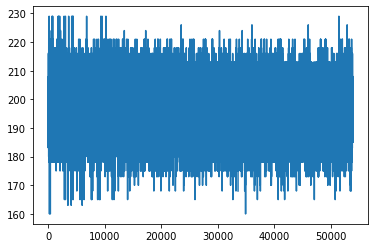

In [ ]:
#EDA

# 데이터의 트렌드...전체적으로 파악하기 좋은 방법들
# Null 값이 있는지.. 평균이나 최소/최대치가 이상하지는 않은지.. 데이터가 어떻게 분포되어있는지.. 등등 파악
# mydata.info()
# mydata.describe()

# 그래프 그려서 시각화 시키기
import matplotlib.pyplot as plt  # matplotlib, seaborn
plt.plot(mydata['height_cm'])



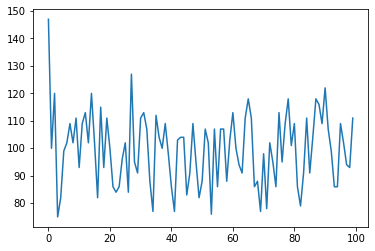

In [ ]:
plt.plot(mydata['weight_kg'][:100])

In [ ]:
# Data Analysis
# 1. Data Extraction ( 데이터 확보 ) <-- Kaggle에서 데이터셋 받음     -------------------- clear ---------------------
# 2. Data Preprocessing ( 데이터 전처리, 데이터 가공 )
#       데이터 전체를 다 쓸 필요가 없음 --> 원하는 만큼, 또는 원하는 컬럼만 잘라서 데이터 가공.
#       (데이터 분석할 때 속도, 용량 차이가 남)
#       의미없는값들 제거
# 3. EDA (Exploratory Data Analysis)
# 4. Data Modeling, Data Analysis
# 5. Data Visualization
# 6. Summary / Conclusion
# 7. Report




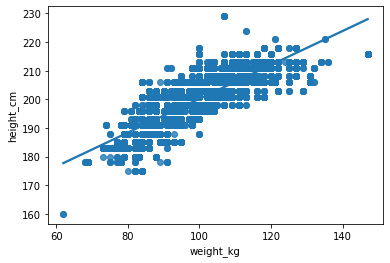

In [ ]:
# y = x
# reg.fit(X,y) ---> y = 2(x) + 3

# scikit-learn <---- 되게 다양한 데이터 분석기법 및 모델링 할 수 있는 기능들이 들어있는 라이브러리
# linear regression
from sklearn.linear_model import LinearRegression

x_cols= ['weight_kg']
X = mydata_dropna.loc[:, x_cols]
y = mydata_dropna.height_cm

reg = LinearRegression()

regfit = reg.fit(X, y)

# plt.plot(regfit)

import seaborn as sns
snsplot = sns.regplot(x='weight_kg', y='height_cm', data=mydata_dropna)




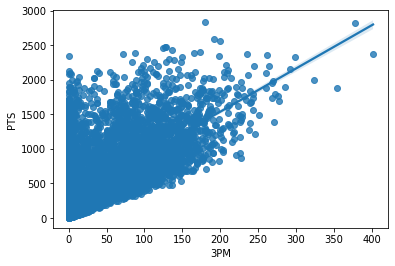

In [ ]:
from sklearn.linear_model import LinearRegression

x_cols = ['3PM']
X = mydata_dropna.loc[:, x_cols]
y = mydata_dropna.PTS

reg = LinearRegression()
refit = reg.fit(X,y)

import seaborn as sns
snsplot = sns.regplot(x='3PM', y='PTS', data =mydata_dropna)


In [ ]:
refit.predict([[1000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6538.6047833])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# x_cols = ['3PM', 'height_cm', 'FGM', 'birth_year', 'DRB']
# x_cols = ['GP', 'MIN', 'FGM','FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK']
x_cols = ['GP', 'MIN', 'FGM','FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK']  # --> Variable Selection

X = mydata_dropna.loc[:, x_cols]
y = mydata_dropna['PTS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

model = LinearRegression()

model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

# 데이터 모델링 할 때 목표: minimizing error !!

mean_squared_error :  0.2075041720627156
mean_absolute_error :  0.04361612445430155


mean_squared_error :  419.48705065691627
mean_absolute_error :  11.689547035418107
mean_squared_error :  376.29644371908336
mean_absolute_error :  11.589573961344838


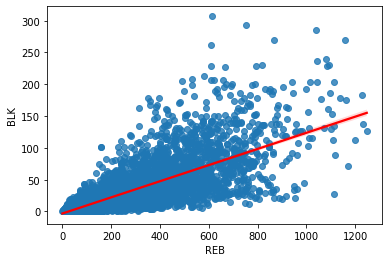

In [ ]:
x_coordinate = ['REB']
x = mydata_dropna.loc[:,x_coordinate]
y = mydata_dropna.BLK
reg = LinearRegression()
refit = reg.fit(x,y)
snsplot = sns.regplot(x='REB',y = 'BLK', data = mydata_dropna, line_kws={"color": "red"})
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =101)
predictions = reg.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


x1_coordinate = ['REB', 'PF' , 'height_cm' , 'weight_kg', 'ORB' , 'DRB']
X1 = mydata_dropna.loc[:, x1_coordinate]
Y = mydata_dropna['BLK']
X1_train, X1_test , Y_train, Y_test = train_test_split(X1,Y, test_size = 0.2, random_state =101)

model = LinearRegression()
model.fit(X1_train,Y_train)

prediction = model.predict(X1_test)

print('mean_squared_error : ', mean_squared_error(Y_test, prediction))
print('mean_absolute_error : ', mean_absolute_error(Y_test, prediction))



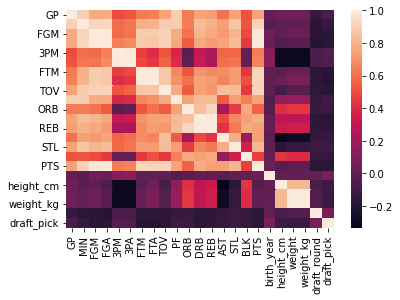

In [ ]:
corr_matrix = mydata_dropna.corr()
sns.heatmap(corr_matrix)

mean_squared_error :  1411.7002486841343
mean_absolute_error :  24.205123297808573


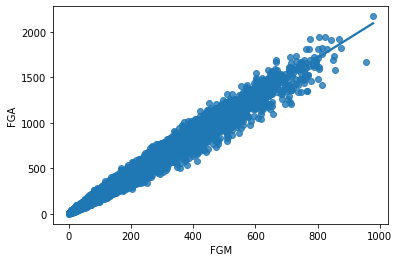

In [ ]:


x_cols = ['FGM']
X = mydata_dropna.loc[:, x_cols]
y = mydata_dropna.FGA

reg = LinearRegression()
refit = reg.fit(X,y)

import seaborn as sns
snsplot = sns.regplot(x='FGM', y='FGA', data =mydata_dropna)

x1_coordinate = ['FGM','3PM','3PA','FTM','FTA']
X1 = mydata_dropna.loc[:, x1_coordinate]
Y = mydata_dropna['FGA']
X1_train, X1_test , Y_train, Y_test = train_test_split(X1,Y, test_size = 0.2, random_state =101)
model = LinearRegression()
model.fit(X1_train,Y_train)

prediction = model.predict(X1_test)

print('mean_squared_error : ', mean_squared_error(Y_test, prediction))
print('mean_absolute_error : ', mean_absolute_error(Y_test, prediction))

In [ ]:
github
=> repository
=> 프로그래밍적인 프로젝트들을 저장/관리 하는 페이지
